In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('airline_sentiment_analysis.csv')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         11541 non-null  int64 
 1   airline_sentiment  11541 non-null  object
 2   text               11541 non-null  object
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


In [24]:
df["airline_sentiment"] = df['airline_sentiment'].astype('category')
df

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...,...
11536,14633,negative,@AmericanAir my flight was Cancelled Flightled...
11537,14634,negative,@AmericanAir right on cue with the delays👌
11538,14635,positive,@AmericanAir thank you we got on a different f...
11539,14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


In [25]:
df["airline_sentiment"] = df['airline_sentiment'].cat.codes
df.head()

,Unnamed: 0,airline_sentiment,text
0,1,1,@VirginAmerica plus you've added commercials t...
1,3,0,@VirginAmerica it's really aggressive to blast...
2,4,0,@VirginAmerica and it's a really big bad thing...
3,5,0,@VirginAmerica seriously would pay $30 a fligh...
4,6,1,"@VirginAmerica yes, nearly every time I fly VX..."


In [26]:
twt = df.copy()
twt

,Unnamed: 0,airline_sentiment,text
0,1,1,@VirginAmerica plus you've added commercials t...
1,3,0,@VirginAmerica it's really aggressive to blast...
2,4,0,@VirginAmerica and it's a really big bad thing...
3,5,0,@VirginAmerica seriously would pay $30 a fligh...
4,6,1,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...,...
11536,14633,0,@AmericanAir my flight was Cancelled Flightled...
11537,14634,0,@AmericanAir right on cue with the delays👌
11538,14635,1,@AmericanAir thank you we got on a different f...
11539,14636,0,@AmericanAir leaving over 20 minutes Late Flig...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(twt['text'])
y = twt['airline_sentiment']

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

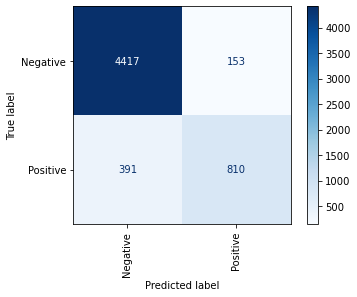

In [30]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'], cmap='Blues', xticks_rotation='vertical')

In [31]:
model.score(x_test, y_test)

0.9057355744238433

In [16]:
text = 'Horrible expeirence with Advanced Airlines who works with EDreams 3rd party booking company, both did not help out my sisutation, they didnt allow me to board my flight and took my money basically. Nobody to talk to or even get me on the next flight they just left me high and dry. Would not recommend flying with them'
model.predict_proba(vectorizer.transform([text]))[0][1]


0.018346274128900802

In [17]:
import joblib
from joblib import dump
dump(model, 'sentiment_classifer.pkl')

['sentiment_classifer.pkl']

In [18]:
import joblib
from joblib import dump
dump(vectorizer, 'countvectorizer.pkl')

['countvectorizer.pkl']